In [1]:
cd ..

/home/thom/Documents/research/RandomBridge


In [2]:
import utils.PyRandomUtils as pru
from pdb import pm
import utils.CardUtils as cu
import numpy as np
import matplotlib.pyplot as plt
import importlib
importlib.reload(cu)
importlib.reload(pru)

<module 'utils.PyRandomUtils' from '/home/thom/Documents/research/RandomBridge/utils/PyRandomUtils.cpython-36m-x86_64-linux-gnu.so'>

In [3]:
batch_size = 36 #number of deals in a batch
num_batches = 1000

In [4]:
DECK = np.array(range(1,53), dtype=np.int8)
ts = cu.theoretical_probabilities
def shuffled(gen):
    return pru.deck(gen)

In [5]:
#bad prng
bad = pru.LCG(mod=2**16, a=5, seed=1, c=0)

#deterministic gen
halton = pru.HaltonGen(base=5)

#good prng
good = pru.PyRandGen(1)


In [6]:
def make_ts(gen, batches=num_batches, batch_size=batch_size):
    ts = [sum((cu.get_features(shuffled(gen)) for i in range(batch_size))) / batch_size
           for j in range(num_batches)]
    return np.array(ts).T

In [7]:

ts_bad = make_ts(bad)

In [8]:
ts_halton = make_ts(halton)

In [9]:
ts_good = make_ts(good)

In [10]:
def make_graphs(ts):
    dim = ts.shape[0]
    fig, ax = plt.subplots(dim,1, figsize = (15, 100))

    for i in range(dim):
        plt.subplot(dim,1,i+1)
        plt.title(cu.feature_string[i],fontsize=16)
        plt.plot(ts[i] - cu.theoretical_probabilities[i])

def print_means(ts):
    means = np.apply_along_axis(np.mean, 1, ts)
    tp = cu.theoretical_probabilities
    print("{:22}{:^22}{:^22}{:^22}".format("Feature", "p", "p_hat", "p-p_hat"))
    for i in range(len(cu.feature_string)):
        print("{:20} {: 20.18f} {: 20.18f} {: 20.18f}".format(cu.feature_string[i], 
                                           cu.theoretical_probabilities[i], 
                                           means[i], 
                                           cu.theoretical_probabilities[i]-means[i]))

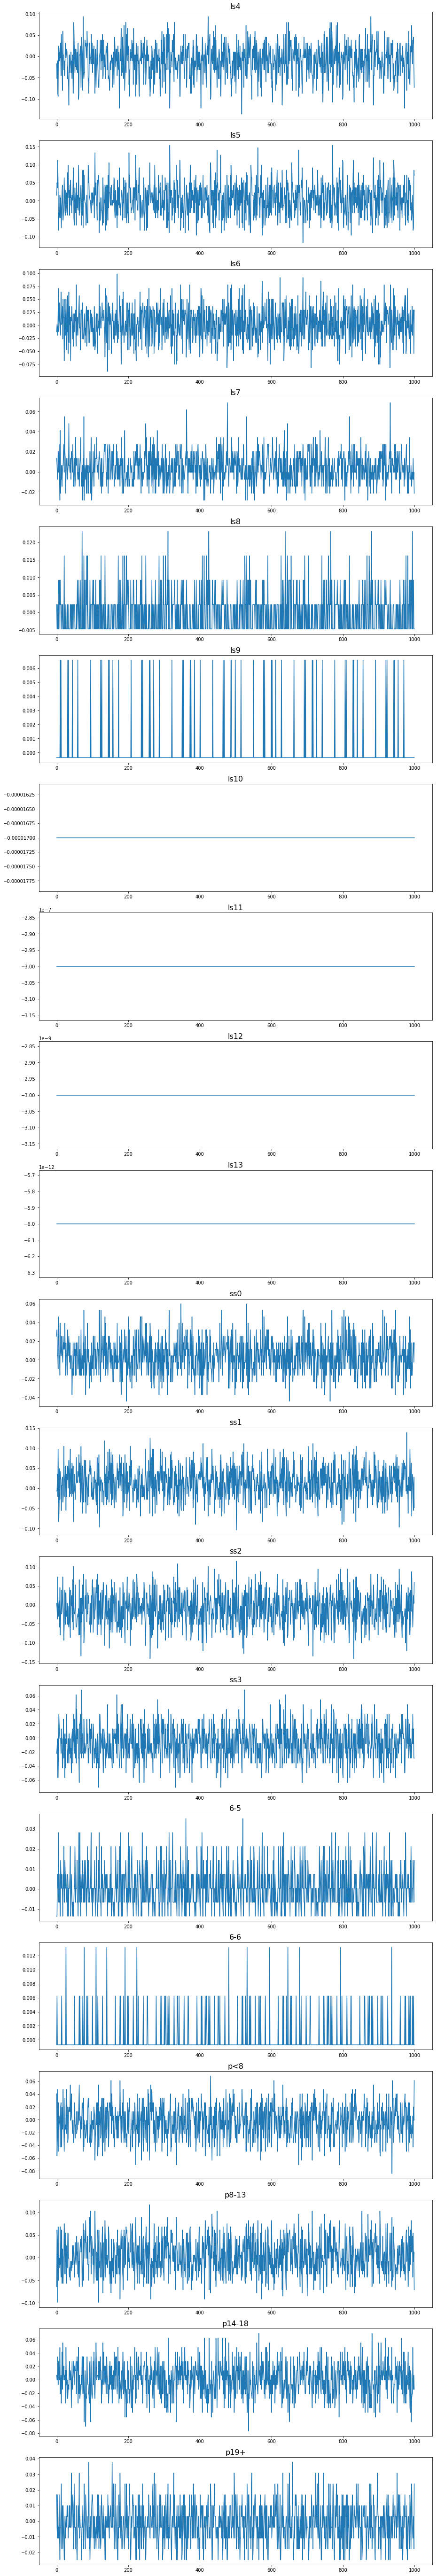

In [11]:
make_graphs(ts_bad)

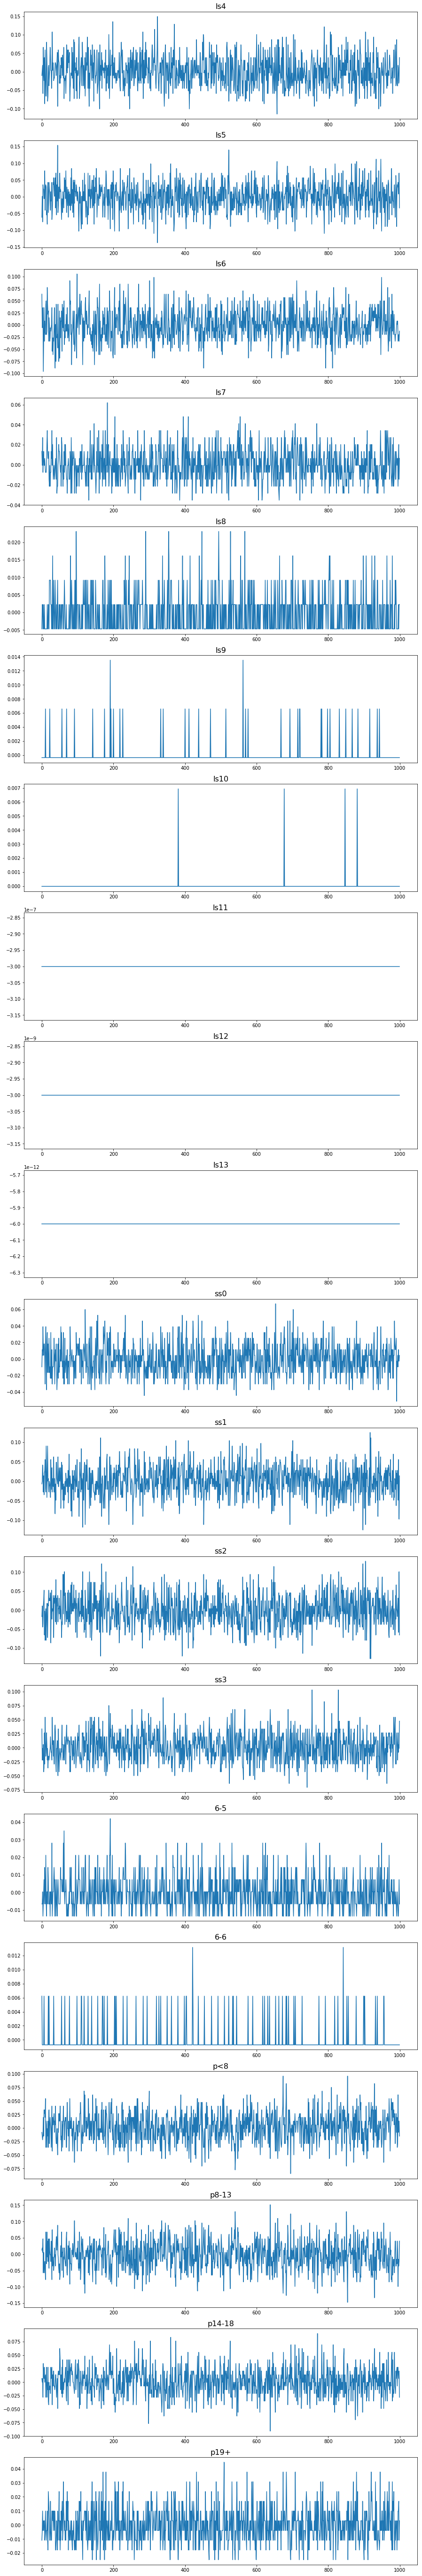

In [12]:
make_graphs(ts_good)

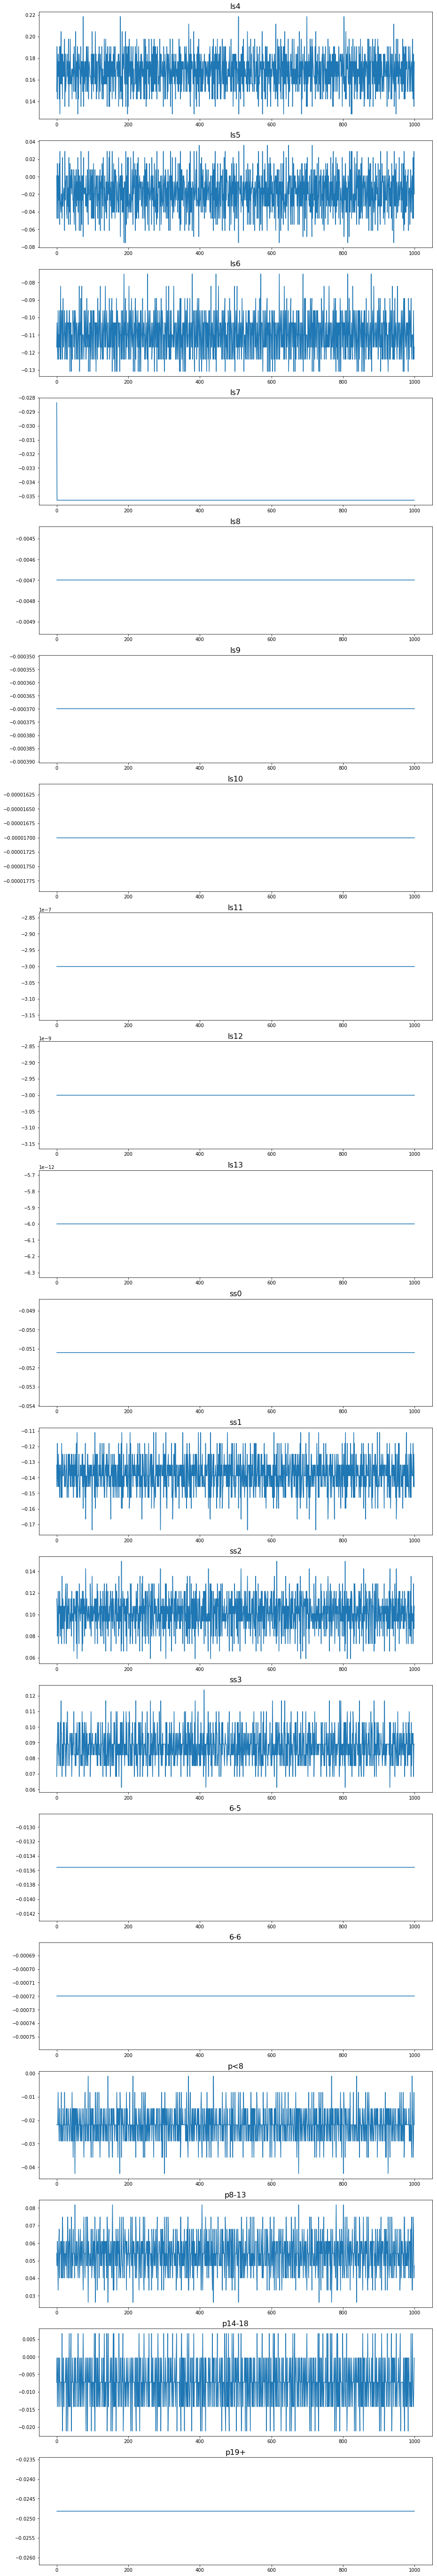

In [13]:
make_graphs(ts_halton)

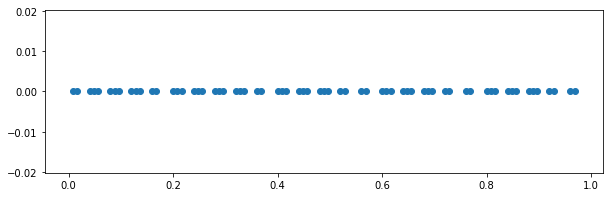

In [38]:
halton2 = pru.HaltonGen(base=5)

fig, ax = plt.subplots(figsize = (10, 3))
num = 66
y = [halton2.rand() for i in range(num)]
# plt.scatter(y, range(num))
plt.scatter(y, [0]*num)


In [22]:
print_means(ts_halton)

Feature                         p                   p_hat                p-p_hat        
ls4                   0.350800000000000001  0.588909722222222154 -0.238109722222222153
ls5                   0.443400000000000016  0.334604166666666702  0.108795833333333314
ls6                   0.165500000000000008  0.066805555555555549  0.098694444444444460
ls7                   0.035299999999999998  0.009680555555555557  0.025619444444444441
ls8                   0.004700000000000000  0.000000000000000000  0.004700000000000000
ls9                   0.000370000000000000  0.000000000000000000  0.000370000000000000
ls10                  0.000017000000000000  0.000000000000000000  0.000017000000000000
ls11                  0.000000300000000000  0.000000000000000000  0.000000300000000000
ls12                  0.000000003000000000  0.000000000000000000  0.000000003000000000
ls13                  0.000000000006000000  0.000000000000000000  0.000000000006000000
ss0                   0.05120000000000000

In [ ]:
p